Case Study On Regression /
The given dataset contains the price of a second-hand Hyundai grand i10 car
with respect to year of making. Find the best linear relationship between year
and price. Can you predict the possible price of a 2022 model second-hand
grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\anitha\DSA\dsa assignments\regression asst\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape
data.columns

Index(['Year', 'Price'], dtype='object')

In [5]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [7]:
x=data['Year']
y=data['Price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [8]:
#Only convert if they are Series
if isinstance(x_train, pd.Series):
    x_train = x_train.to_frame()

if isinstance(y_train, pd.Series):
    y_train = y_train.to_frame()
x_test = pd.DataFrame(x_test, columns=x_train.columns)


In [9]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

In [10]:
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization parameter
lasso_model.fit(x_train, y_train)
lasso_pred = lasso_model.predict(x_test)

In [11]:
lr_mse = mean_squared_error(y_test, lr_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

print("Linear Regression MSE",lr_mse)
print("Lasso Regression MSE",lasso_mse)

Linear Regression MSE 3878767151.0731072
Lasso Regression MSE 3878764025.5442586


In [12]:

year_2022 = pd.DataFrame({'Year': [2022]})

# Predict
lr_price_2022 = lr_model.predict(year_2022)
lasso_price_2022 = lasso_model.predict(year_2022)

# Extract scalar values and format
print('Predicted 2022 price (Linear Regression): ₹',lr_price_2022.item())
print('Predicted 2022 price (Lasso Regression):₹ ',lasso_price_2022.item())

Predicted 2022 price (Linear Regression): ₹ 740160.1193776578
Predicted 2022 price (Lasso Regression):₹  740159.9031400383


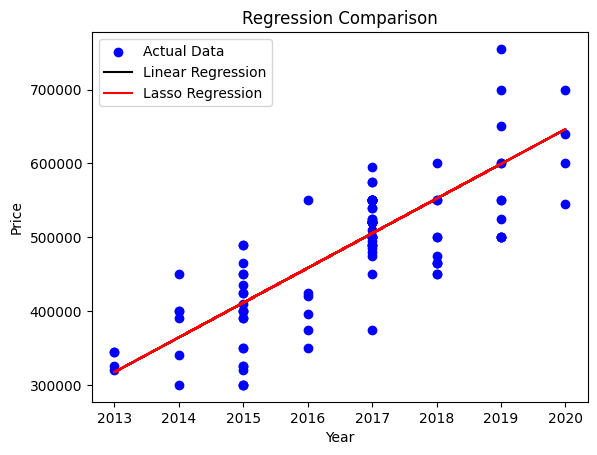

In [13]:
x_reshape = x.to_frame()
plt.scatter(x, y, color='blue', label='Actual Data')
plt.plot(x, lr_model.predict(x_reshape), color='black', label='Linear Regression')
plt.plot(x, lasso_model.predict(x_reshape), color='red', label='Lasso Regression')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Regression Comparison')
plt.legend()
plt.show()

Linear Regression is a straightforward approach that may perform well with a simple dataset.

Lasso Regression adds regularization, which can help in preventing overfitting, especially with more complex datasets.

Based on the evaluation metrics (R² and MSE), you can select the model that best fits your data. If you have additional features (e.g., mileage, number of owners), incorporating them into the models could improve accuracy.